[*********************100%***********************]  1 of 1 completed


<AxesSubplot:title={'center':'VTI'}, xlabel='Date'>

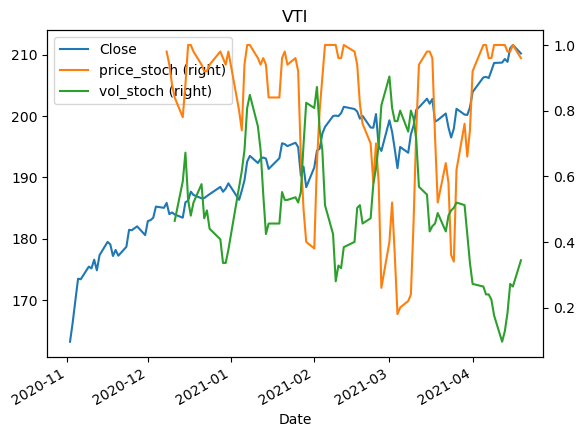

In [18]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
import pandas_ta as ta

def get_indicator(q, ind_name, params):
    ts = None
    if ind_name == "atr":
        ts = q.ta.atr(params['length'],fillna=0)
        
    return ts

window=25
ticker='VTI'
df=yf.download(tickers= ticker,start= '2020-11-01', end='2021-4-20',interval = "1d",
                     group_by = 'column',auto_adjust = True, prepost = True, 
                     proxy = None)
df['pctile_price'] = df['Close'].rolling(window).rank(pct=True)
df['price_stoch']=df['pctile_price'].rolling(2).mean()
df['atr'] = get_indicator(df, 'atr', {'length': 1})
df['pctile_volatility'] = df['atr'].rolling(window).rank(pct=True)
df['vol_stoch']=df['pctile_volatility'].rolling(5).mean()


df[['Close','price_stoch','vol_stoch']].plot(secondary_y=['price_stoch','vol_stoch'],title=ticker)